### Google Trends

#### 1. Install PyTrends

In [1]:
## install  the libs
# !pip install pytrends
# !pip install statsmodels user
# !pip install seaborn



In [2]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import numpy as np
import datetime as dt
from datetime import date
from pytrends.request import TrendReq
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Notebook settings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pytrends = TrendReq(hl='en_US', tz=360)
# sns.set_theme()

#### Retrieve Google Trends Data

In [3]:
# kw_list = ['Pimalai Resort & Spa']

kw_list = ['Intercontinental Phuket']
frequency = 'daily' # must be  hourly or daily
# for whatever reason, I can't get a different Geo to work e.g. CZ
geo = 'US'
hl='en_US'

# Select Start Date
year_start = 2022
month_start = 1
day_start=1
hour_start=0

# Select End Date
year_end=2022
month_end=11
day_end=19
hour_end=0

# Run PyTrends
google_trends = pytrends.get_historical_interest(kw_list,
                                 year_start = year_start, 
                                 month_start = month_start, 
                                 day_start = day_start, 
                                 hour_start = hour_start, 
                                 year_end = year_end, 
                                 month_end = month_end, 
                                 day_end = day_end, 
                                 hour_end = hour_end, 
                                 cat=0, 
                                 geo=geo, 
                                 gprop='', 
                                 sleep=0,
                                 frequency=frequency)


google_trends = google_trends.reset_index()
google_trends.columns = ['date', 'keyword','partial']
google_trends.drop(['partial'], axis=1, inplace=True)
pd.to_datetime(google_trends['date'])
# show the top 5 rows (sanity check)
google_trends.head()

,date,keyword
0,2022-01-01,45
1,2022-01-02,0
2,2022-01-03,0
3,2022-01-04,42
4,2022-01-05,0


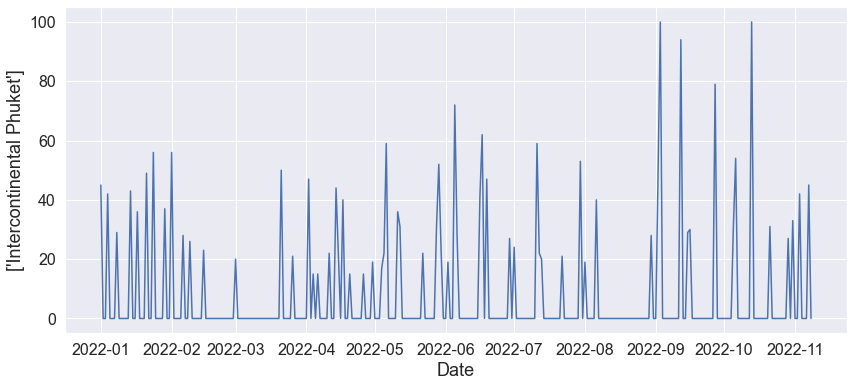

In [4]:
# Plot google trends over time
today = date.today()
# create a date object
d1 = today.strftime("%Y_%m_%d")

sns.set(rc={"figure.figsize":(14, 6)})

sns.lineplot(data=google_trends, x='date', y='keyword')
plt.xlabel('Date', fontsize = 18)
plt.ylabel(str(kw_list), fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.savefig(str(kw_list) +'_' +'_' + d1 +'_'+ "google_trend_plot.png", dpi=360, bbox_inches='tight')
plt.show()

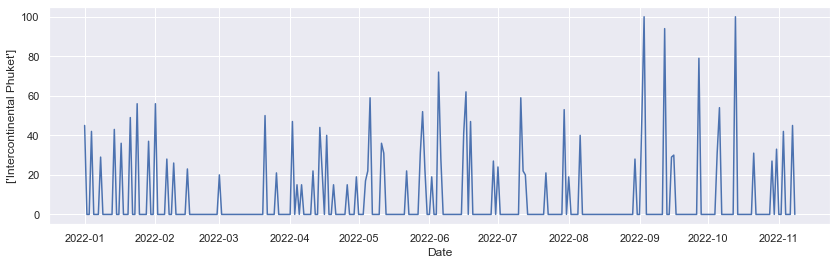

In [5]:
# Plot google trends over time
sns.set(rc={"figure.figsize":(14, 4)})

sns.lineplot(data=google_trends, x='date', y='keyword')
plt.xlabel('Date')
plt.ylabel(str(kw_list))
# plt.savefig("google_trend_plot.jpg", dpi=360, bbox_inches='tight')
plt.show()

In [6]:
# Save Google Trends file
today = date.today()
# create a date object
d1 = today.strftime("%Y_%m_%d")
# google_trends.to_csv('google_trends_'+ kw_list[0]+'_'+ d1+'.csv')
google_trends.to_csv((kw_list[0]) + '_'+ d1+'.csv')

### Google Trends Keywords Suggestion

In [7]:
# Get Google Keyword Suggestions
pytrend = TrendReq()
# it's not going to take any other language as EN is hardcoded
keywords = pytrend.suggestions(keyword='Pimalai Resort & Spa')
df = pd.DataFrame(keywords)
df.head(10)

,mid,title,type
0,/g/1td10253,Pimalai Resort and Spa,"Resort hotel in Ko Lanta Yai, Thailand"


### Dummy Variables

#### Federal Holidays

In [8]:
google_trends
google_trends.head()

,date,keyword
0,2022-01-01,45
1,2022-01-02,0
2,2022-01-03,0
3,2022-01-04,42
4,2022-01-05,0


In [9]:
cal = calendar()
holidays = cal.holidays(start = google_trends['date'].min(), end = google_trends['date'].max())
google_trends['holiday'] = google_trends['date'].isin(holidays)
google_trends['holiday'] = google_trends['holiday'].apply(lambda x: 1 if x == True else 0)
google_trends.head()

,date,keyword,holiday
0,2022-01-01,45,0
1,2022-01-02,0,0
2,2022-01-03,0,0
3,2022-01-04,42,0
4,2022-01-05,0,0


#### Day of the Week

In [10]:
# Getting the day of the week
google_trends['d'] = google_trends['date'].dt.dayofweek

# Creating is_weekday variable
google_trends['is_weekday'] = google_trends['d'].apply(lambda x: 1 if x != 5 and x !=6 else 0)

# Creating is_weekend variable
google_trends['is_weekend'] = google_trends['d'].apply(lambda x: 1 if x == 5 or x == 6 else 0)
google_trends.head()

,date,keyword,holiday,d,is_weekday,is_weekend
0,2022-01-01,45,0,5,0,1
1,2022-01-02,0,0,6,0,1
2,2022-01-03,0,0,0,1,0
3,2022-01-04,42,0,1,1,0
4,2022-01-05,0,0,2,1,0


In [11]:
google_trends['d'] = google_trends['d'].apply(lambda x: 'Monday' if x == 0 else
                              'Tuesday' if x == 1 else
                              'wednesday' if x == 2 else
                              'thursday' if x == 3 else
                              'friday' if x == 4 else
                              'saturday' if x == 5 else
                              'sunday' if x == 6
                    else x)

In [12]:
google_trends

,date,keyword,holiday,d,is_weekday,is_weekend
0,2022-01-01,45,0,saturday,0,1
1,2022-01-02,0,0,sunday,0,1
2,2022-01-03,0,0,Monday,1,0
3,2022-01-04,42,0,Tuesday,1,0
4,2022-01-05,0,0,wednesday,1,0
5,2022-01-06,0,0,thursday,1,0
6,2022-01-07,0,0,friday,1,0
7,2022-01-08,29,0,saturday,0,1
8,2022-01-09,0,0,sunday,0,1
9,2022-01-10,0,0,Monday,1,0
